# Tutorial 3 Clustering
In this tutorial, we will learn how to apply clustering techniques in the data mining task. Clustering techniques are also called as ‘Descriptive Modelling’ or ‘Unsupervised (machine) learning’.
The goal of clustering is finding groups of objects such that the objects in a group will be similar (or related) to one another and different from (or unrelated to) the objects in other groups.


<p style="color:red">Sample Excercises</p>These excerces are not assessed. They are given for improving your understanding. Take help of your tutor to check whether your answers are correct.

### IRIS Dataset
For learning how to cluster data, we would be using a predefined dataset in Scikit-learn library. [`<https://en.wikipedia.org/wiki/Iris_flower_data_set>`]
The dataset we are using today is `iris` plant dataset, which is the best known database to be found in the pattern recognition (classification or clustering). The Iris data set contains following 3 classes of 150 instances each, where each class refers to a type of iris plant.

In above data, for each data point we have four attributes or features and one label. The four attributes are Sepal.Length, Sepal.Width, Petal.Length, Petal.Width. These features help us to differentiate between different species of iris.
    

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
iris

It can be noted that it is not a Pandas dataframe, so your regular dataframe functions such as head() etc will not work. It is an object where data is contained as 2D array. *iris.target* contains the labels for the data. As we are clustering, we will ignore these labels for now.

## KMEANS CLUSTERING
The k-means algorithm is an algorithm to cluster n objects based on attributes into k partitions, where k < n.
The following list contains the process of k-means clustering.
<ol>
<li>Decide the number of clusters k
<li>Initialise the centre of the clusters
<li>Attribute the closest cluster to each data point 
<li>Set the position of each cluster to the mean of all data points belonging to that cluster 
<li>Repeat steps 2-3 until convergence

</ol>



More details about the Python method: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmean#sklearn.cluster.KMeans

Let’s apply kmeans function and define K as 3. (remember in this case we know previously that K=3, it may not be always true. In that case what you will do?)


In [ ]:
from sklearn.cluster import KMeans
#applying Kmeans
model = KMeans(n_clusters=3)
model.fit(iris.data)

#to see labels for each point
model.labels_

The following components are available to have a look at the detailed information of the created
clusters.

<li> <b>cluster_centers_</b> : ndarray of shape (n_clusters, n_features) that gives coordinates of cluster centers. 
    
<li><b>labels_</b>: ndarray of shape (n_samples,) that gives labels of each point

<li><b>inertia_</b>: float value that gives the sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.

<li><b>n_iter_ </b>: int value that gives number of iterations run.

<li><b>n_features_in_ </b>: int value that gives the number of features seen during fit.



In [ ]:
#getting the cluster centers. It can be noticed that centers have 4 dimensions.
model.cluster_centers_

By using above information, you can plot the data points and specify the clusters.
Note that there are four dimensions in the data and only the first two dimensions are used to
draw the plot below. Therefore, some centers seems to be closer to other clusters.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.title("KMEAN CLUSTERING")
centroids = model.cluster_centers_
plt.scatter(iris.data[:,0], iris.data[:,1], c= model.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

### Evaluating You Clustering results

Normally, clustering result is very hard to evaluate since there is no class/label available in the dataset. Hence, it is difficult to say visually that whether the data is well grouped or not. HOWEVER, in this dataset, we have the actual labels.

In [ ]:
#labels
iris.target

In [ ]:
#label names
iris.target_names

In [ ]:
y=iris.target
#creating a pandas dataframe
df = pd.DataFrame({'labels': model.labels_, 'real_label': y})
#print(df.head(20))
matching=pd.crosstab(df['labels'],df['real_label'])
print(matching)

#calculate purity

print(matching.max(axis=1).sum()/df[df.columns[0]].count())

### Finding Best value for k : Elbow Method

To find best k in kmean algorithm, we need to use elbow method where we calculate a closeness measure(inertia) for different values of k and choose most optimal k. 

In [ ]:
%env OMP_NUM_THREADS=1
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(iris.data)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

Based on this graph we can see after cluster number =3, graph start becoming horizontal. This is the point which will be most optimal to choose.


## Hierarchical Clustering

Hierarchical clustering builds a binary tree of the data that successively merges similar groups of points.
In order to see the clear and neat binary tree, it would be better to have small amount of dataset.
So, let’s take small dataset. There are different ways in which clusters can be created.
Read more about it from here:https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [ ]:
#get the dataset in panda dataframe
from pandas import DataFrame
import pandas as pd
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names) #creating dataframe
#iris_sampled=iris_df.sample(n=50)

import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

#Creating a function for ploting
def plot3D(X, labels, linkage):
   # plt.title("Hierarchical Clustering: "+linkage)
    #plt.scatter(X.iloc[:,0], X.iloc[:,1], c= label.astype(float), s=50, alpha=0.5)
    #plt.show()
    fig = plt.figure(linkage, figsize=(4, 3))
    ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
    ax.set_position([0, 0, 0.95, 1])

    ax.scatter(X.iloc[:,3], X.iloc[:,0], X.iloc[:,2], c=labels.astype(float), edgecolor="k")

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title("Hierarchical Clustering: "+linkage)
    ax.dist = 12
   
#let us do the clustering
for linkage in ( "average", "complete", "single"):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3)
    
    clustering.fit(iris_df)
    print(clustering.labels_)
    plot3D(iris_df,clustering.labels_,linkage)
   



<p style="color:red">Sample Excercise:</p> Try comparing the cluster purity of different algorithms with KMean 

## DBSCAN Clustering
DBSCAN clustering is also called Density-Based Spatial Clustering of Applications with Noise. It helps in identifying outliers and make clusters based on density. Read more about it from here: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [ ]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
#create datasets of 500 samples
#data with circular shape
noisy_circles = datasets.make_circles(500, factor=0.5, noise=0.05)
#data with moon shape
noisy_moons = make_moons(500, noise=0.05)
#These datasets contain the data with label, to seperate data from label we will do following
X, y=noisy_circles 

#normalise data
circle_normal = StandardScaler().fit_transform(X)
#moons_normal=StandardScaler().fit_transform(noisy_moons)

#Apply DBScan

db = DBSCAN(eps=0.3, min_samples=7).fit(circle_normal)

#get prdicted labels
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(n_clusters_)

#Number of noise points
n_noise_ = list(labels).count(-1)

#plotting the clustering
plt.scatter(X[:, 0], X[:, 1], s=10, c=labels.astype(float))
plt.show()

In [ ]:
<p style="color:red">Sample Excercise:</p> What will be the result if you use KMEAN Cluster?

## Clustering Example With Real World use case.

This tutorial will guide you how to apply clustering technique in the real-world problem. In recent years there has been a  growing interest in developing effective methods for content-based image retrieval (CBIR). Image clustering is one of the most popular approaches for high-level description of image content. The goal is to find a mapping of the archive images into clusters such that the set of classes provide essentially the same information about the image archive as the entire image-set collection. Image clustering enables the implementation of efficient retrieval algorithms and can also be used to compress the data.
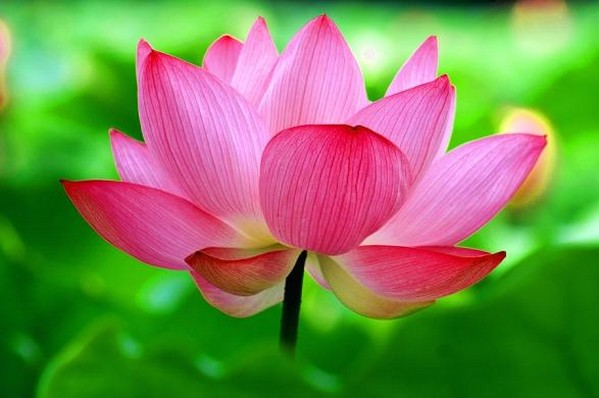

In [ ]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#reading the image and displaying it
plt.rcParams['figure.figsize'] = (10, 6)
image = io.imread('lotus.jpg')
labels = plt.axes(xticks=[], yticks=[])
labels.imshow(image);

print(image.shape)

In [ ]:
#currently data is 3 dimentional. for doing clustering we need 2 D array.
#Reshaping the image

rows = image.shape[0]
cols = image.shape[1]

image = image.reshape(rows*cols, 3)
image

In [ ]:
#number of cluster~number of colors we want in picture. 
#applying Kmeans

model = KMeans(n_clusters=32)
model.fit(image)

In [ ]:
#compressing the image using the centroid values
image_compress = model.cluster_centers_[model.labels_]
image_compress = np.clip(image_compress.astype('uint8'), 0, 255)
#reshaping the image
image_compress = image_compress.reshape(rows, cols, 3)

In [ ]:
io.imsave('lotus_compressed.png', image_compress)
io.imshow(image_compress)
io.show()

<p style="color:red">Sample Excercise:</p> Try with different number of clusters